<a href="https://colab.research.google.com/github/Jishnuprakash/IntroToDeepLearning/blob/main/DL_04_Mnist_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use Deep Learning to classify Mnsit digits 

In [58]:
#Load MNIST Dataset
from keras.datasets import mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

5


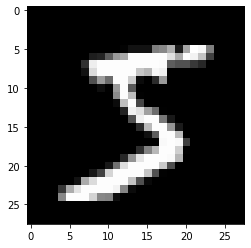

In [59]:
#Show Train image
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap='gray')
print(train_labels[0])

In [60]:
#Data Preprocessing
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [61]:
#Model Building
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [27]:
#Compile and Fit 
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
h = model.fit(train_images, train_labels, epochs=2, batch_size=64, validation_split=0.3)

Epoch 1/2
657/657 [==============================] - 39s 59ms/step - loss: 0.2307 - accuracy: 0.9279 - val_loss: 0.1216 - val_accuracy: 0.9602
Epoch 2/2
657/657 [==============================] - 39s 59ms/step - loss: 0.0594 - accuracy: 0.9812 - val_loss: 0.0636 - val_accuracy: 0.9805


Text(0.5, 0, 'Epochs')

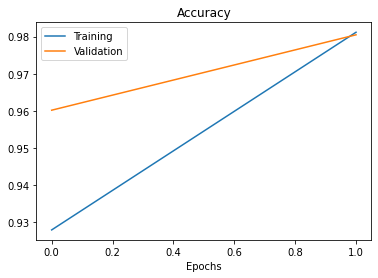

In [62]:
#Plot Training and Validation Accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

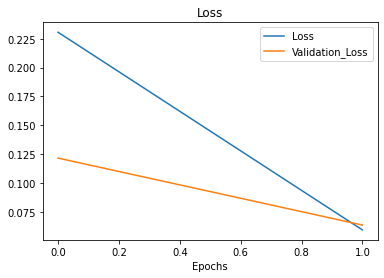

In [30]:
#Plot Training and Validation Loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['Loss', 'Validation_Loss'])
plt.title('Loss')
plt.xlabel('Epochs')

In [31]:
# Make predictions using TestData
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 3s 10ms/step - loss: 0.0522 - accuracy: 0.9833


0.983299970626831

Some live recognition models

http://www.denseinl2.com/webcnn/digitdemo.html

https://digit-recognition.ixartz.com/